<a href="https://colab.research.google.com/github/cs167/project-2-niclacey/blob/main/Project_2_Nicole%20Lacey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project \#2 Starter Code Nicole Lacey
Your project should address the categories below. 

## Problem:
Not knowing if a given review is a positive one or a negative one. I will use different models to try and predict the sentiment on reviews. THis is useful for pretty much any company that sells a product. For clothing reviews, movie reviews, etc. its an easy way to tell if their products are doing well or not. 



# Input Pipeline (sklearn):

In [1]:
from google.colab import drive
import pandas
drive.mount('/content/drive')
data = pandas.read_csv('/content/drive/MyDrive/Datasets/IMDB_dataset.csv')
data.head()

Mounted at /content/drive


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Exploration:
- Number of samples
- Number of classes of the target variable
- Number of words per sample
- Distribution of sample length
- Something else: get creative :) 

review       50000
sentiment    50000
dtype: int64
231.15694


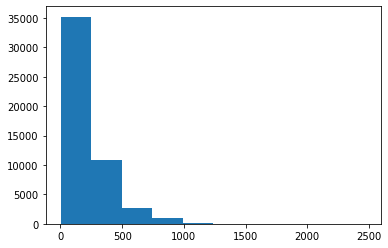

2470

In [2]:
import matplotlib.pyplot as plt
import numpy as np
## Use cells here to explore the data:
#number of samples 
print(data.count()) #50,000 samples

#number of classes of the target variable sentiment
data['sentiment'].unique() #either positive or negative

#number of words per sample # full disclosure i got this code from stacks overflow 
data['Avg_length'] = data["review"].apply(lambda x: len(x.split()))
print(sum(data['Avg_length'])/len(data['Avg_length']))

plt.hist(data['Avg_length'])  
plt.show()

max(data['Avg_length']) # this is a crazy long review. They mustve been really passionate haha

First, i printed the amount of samples, which is 50,000. Then, I looked to see what the unique sentiments are, and it is Positive and Negative, which makes sense. After that, I made a new column of the number of words in each review, and took the average of that list. I then graphed it, and you can see that the majority of the reviews are pretty short (i.e. below 250 words). For fun I found the longest review which was 2470 words. Doubt anyone would write a review that long if they liked the movie so Im going to assume its a bad one haha! 

## Data Preparation

I'm providing you with code that cleans the reviews by making it all lowercase letters and removing stop words. The three cells below do this for you. I still want you to explain what you did with the data here. 

In [3]:
from bs4 import BeautifulSoup
import re
import nltk
#only do next line once
nltk.download() #in Corpora tab, download stopwords
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
#The NLTK downloader will open, you need to select (d) for Download, and then 'stopwords'then (q) to quit

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [4]:
#This is a function that takes in a review, makes sure it is only lower case letters and removes stopwords.
#It returns the cleaned review text.
def clean_review(review):
    #input is a string review
    #return is review cleaned of all punctuation, lowercase, and removed nltk stopwords
    letters_only = re.sub("[^a-zA-Z]"," ",review)
    lower_case = letters_only.lower()
    words = lower_case.split()
    for stop_word in stopwords.words("english"):
        while stop_word in words:
            words.remove(stop_word)
    cleaned = " ".join(words)
    return cleaned

In [5]:
#process the data
cleaned_text = []
for i in range(len(data)):
    cleaned_text.append(clean_review(data["review"][i]))  

In [6]:
cleaned_text[:5]

['one reviewers mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away br br would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches du

In [7]:
#establish training and testing dataset
train_data, test_data, train_sln, test_sln = \
    train_test_split(cleaned_text, data['sentiment'], test_size = 0.2, random_state=0) 

Here, I download a nltk package and choose stopwords to be how the data is minimized. This will remove all stopwords in the dataset. (words like is, a, the, etc.) Then, i use the stopwords package and also make sure the entire thing is in lower case. This performed a big part in cleaning the data. Then, I append the cleaned text back to the review.


### Vectorizing the data

**CountVectorizer**: Convert a collection of text documents to a matrix of token counts

In [8]:
from sklearn.feature_extraction.text import CountVectorizer 

#Bag of Words with 5000 most common words
vectorizer = CountVectorizer(analyzer='word', max_features = 500)
#find the right 5000 words
vectorizer.fit(train_data)

#use the vectorizer to transform review strings into word count vectors 
train_data_vectors = vectorizer.transform(train_data).toarray()
test_data_vectors = vectorizer.transform(test_data).toarray()

In [9]:
## Now use train_data_vectors and test_data_vectors to train/test/tune your sklearn models.
from google.colab import drive
import pandas as pd
import numpy
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import neural_network

import matplotlib.pyplot as plt
from itertools import product
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
%matplotlib inline

##Metrics
accuracy and confusion matrices

##Model Planning and Execution
-Default SVC, try to tune the kernel, try linear most likely. \
-Default Perceptron \
-Tuned pereptron, going to try tuning the penalty, shuffle, and learning rate\
-Multilayer Perceptron \
-Tuned Multilayer Perceptron, going to try all the different activations, learning rate, and early stopping\
-Principal Component Analysis

In [10]:
#Default SVC
clf = SVC()
clf.fit(train_data_vectors,train_sln)
predictions = clf.predict(test_data_vectors)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data['sentiment'].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

accuracy: 0.8307
            Pred positive  Pred negative
T positive           4203            762
T negative            931           4104


###Perceptron 

In [ ]:
#Default Perceptron
dperc = Perceptron()
dperc.fit(train_data_vectors,train_sln)
predictions = dperc.predict(test_data_vectors)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data['sentiment'].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))



accuracy: 0.7841
            Pred positive  Pred negative
T positive           4097            868
T negative           1291           3744


In [ ]:
#Tuned Perceptron
tperc = Perceptron(penalty = 'l2', shuffle = False)
tperc.fit(train_data_vectors,train_sln)
predictions = tperc.predict(test_data_vectors)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data['sentiment'].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))


accuracy: 0.7742
            Pred positive  Pred negative
T positive           3587           1378
T negative            880           4155


## MLP multi layer perceptron

In [ ]:
mlp = neural_network.MLPClassifier()
mlp.fit(train_data_vectors, train_sln)
predictions = mlp.predict(test_data_vectors)
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data['sentiment'].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

accuracy: 0.8083
            Pred positive  Pred negative
T positive           4004            961
T negative            956           4079


In [ ]:
mlp = neural_network.MLPClassifier(activation = 'tanh',)
mlp.fit(train_data_vectors, train_sln)
predictions = mlp.predict(test_data_vectors)
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data['sentiment'].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

accuracy: 0.8116
            Pred positive  Pred negative
T positive           4007            958
T negative            926           4109


##Principal Compenent Analysis

In [15]:
#PCA on best model
# a couple of models all performed with the same accuracy (only getting one wrong), so i'm going to use the tuned SVC.
from sklearn.decomposition import PCA
extractor = PCA(n_components = 2, whiten = True)
extractor.fit(train_data_vectors)
print(extractor.explained_variance_ratio_)

train_transformed = extractor.transform(train_data_vectors)
test_transformed = extractor.transform(test_data_vectors)

mlp = neural_network.MLPClassifier()
mlp.fit(train_data_vectors, train_sln)
predictions = mlp.predict(test_data_vectors)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data['sentiment'].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))


[0.27172574 0.05478849]
accuracy: 0.8112
            Pred positive  Pred negative
T positive           4054            911
T negative            977           4058


##Bumps in the Road
The first bump that i encountered was the loading time for my SVC models. It took up to an hour to load the tuned version. I ended having to remove the tuned version. The perceptrons and multilayer perceptrons worked just fine, however. I did struggle a bit in the beginning too, because I found the max sample, the one with the largest amoutn of words. And i was unable to find the exact location so I could read it, which was the goal. I also struggled throughout to get an accuracy higher than 83%, which is unfortunate. I tried lots of different tuning parameters thought, so I decided to just leave it be. I also struggled to make a quantitative graph that held meaning. I did make one that only had one bar (see below) and then was able to make a fancy confusion matrix. 

##Results
Confusion matrices are inlcuded above. Will be making a fancy confusion matrix as well. 

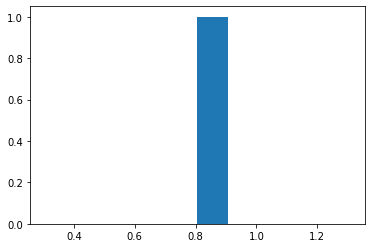

In [ ]:
plt.hist(metrics.accuracy_score(test_sln, predictions))  
plt.show()

Text(0.5, 0, 'Predicted label')

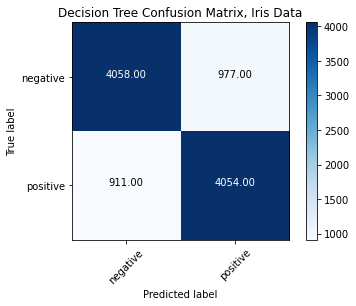

In [16]:
import itertools
import matplotlib.pyplot as plt
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

cm=metrics.confusion_matrix(test_sln,predictions)
plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix, Iris Data")
plt.colorbar()
plt.xticks([0,1], mlp.classes_,rotation=45)
plt.yticks([0,1], mlp.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

##Conclusions 
I found it interesting that the accuracy would change on the neural network when I ran it without making changes. It once got up to 83% accuracy and then most recent was 81% accurate. I think these models do a decent job of detecting sentiment on the reviews. My question is how to use the model we made on a new dataset that doesnt have the answers? I was thinking about using a similar algorithm to predicts revenues at my job and I don't know what the next step would be. \ The best model was the default SVC. This one took very very long to run, and I did have a tuned version that I wanted to work because I was optimistic about an even higher accuracy, but i ran it for over an hour. The webpage ended up timing out so i abandonded that. The worst models were the perceptron and the tuned perceptron. They were at about 77% acuracy. I think the best tuned model was actually .01 worse than the default as well. I would guess that the perceptron one suffered from overfitting, because that can happen easily with those models. I do think these models did well, overall. I'd like to see how these perform on a new dataset as well, possibly with more sentiment options.